In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "test.csv")

filepath


'/Users/ctgy/Bigdata/project_1/test.csv'

In [3]:
filepath_2 = os.path.join(pwd, "train.csv")
filepath_2

'/Users/ctgy/Bigdata/project_1/train.csv'

# Data Exploration

In [4]:
test_data = pd.read_csv(filepath)
test_data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de..."
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/20/04,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The call of the wild, the thrill of adventure....",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre..

In [5]:
train_data = pd.read_csv(filepath_2)
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [8]:
#see test data shape
print('Test data row:',test_data.shape[0], 'columns:', test_data.shape[1]) 

Test data row: 4398 columns: 22


test data has no revenue columns.

In [9]:
#see train data shape
print('Train data row:',train_data.shape[0], 'columns:', train_data.shape[1])

Train data row: 3000 columns: 23


In [10]:
#sort in descending (null values sum)
test_data.isna().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
id                          0
dtype: int64

In [11]:
#sort in descending (null values sum)
train_data.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

In [12]:
train_data['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [13]:
train_data['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='budget'>

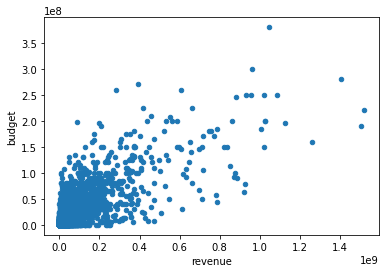

In [14]:
#plot scatter to gain insight
train_data.plot.scatter('revenue','budget')

The plot does not show a clear trend between budget and revenue but it does indicate high budget movie usually come with higher revenue.

## Top 15 most popular movies

In [15]:
#use ast.literaleval for safely evaluating strings from untrusted source
import ast
dictionary = ['genres','production_companies','production_countries','spoken_languages','Keywords','cast','crew']
for column in dictionary:
    train_data[column] = train_data[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [16]:
#obtain name from JSON object. only get director name from crew, 4 cast members from cast columns
def modify_name(x, column):
    names = []
    for attributes in x :
        if column == 'cast':
            if attributes['order'] in (0,1,2,3):
                names.append(attributes['name'])
        elif attributes == 'crew':
            if attributes['job']=='Director':
                names.append(attributes['name'])
        else:
            names.append(attributes['name'])
    
    return names

for column in dictionary:
    train_data[column] = train_data[column].apply(lambda x : modify_name(x, column))



In [17]:
train_data.head(n=5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[English, हिन्दी]",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,[한국어/조선말],Released,NaN,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970


In [18]:
popular_movies = train_data.sort_values('popularity', ascending=False).head(n=15)

#change budget figure into millions
popular_movies['budget(mil)'] = popular_movies['budget'].apply(lambda x : x//1000000)

#change revenue figure into millions
popular_movies['revenue(mil)'] = popular_movies['revenue'].apply(lambda x : x//1000000)

popular_movies[['original_title','genres','popularity','production_companies','cast','crew','budget(mil)','revenue(mil)']]


,original_title,genres,popularity,production_companies,cast,crew,budget(mil),revenue(mil)
518,Wonder Woman,"[Action, Adventure, Fantasy]",294.337037,"[Dune Entertainment, Atlas Entertainment, Warn...",[],[],149,820
684,Beauty and the Beast,"[Family, Fantasy, Romance]",287.253654,"[Walt Disney Pictures, Mandeville Films]","[Emma Watson, Dan Stevens, Luke Evans, Kevin K...","[Bill Condon, Stephen Chbosky, Alan Menken, Vi...",160,1262
1695,Baby Driver,"[Action, Crime]",228.032744,"[Big Talk Productions, TriStar Pictures, Media...","[Ansel Elgort, Lily James, Kevin Spacey, Jamie...","[Edgar Wright, Edgar Wright, Tim Bevan, James ...",34,224
2326,Deadpool,"[Action, Adventure, Comedy]",187.860492,"[Twentieth Century Fox Film Corporation, Marve...","[Ryan Reynolds, Morena Baccarin, Ed Skrein, T....","[Robert Alonzo, Tim Miller, Rhett Reese, Paul ...",58,783
2126,Guardians of the Galaxy Vol. 2,"[Action, Adventure, Comedy, Science Fiction]",185.330992,"[Walt Disney Pictures, Marvel Studios]","[Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...","[Lisa J. Levine, Jason C. Lewis, Lora Hirschbe...",200,863
1309,Gone Girl,"[Mystery, Thriller, Drama]",154.801009,"[Twentieth Century Fox Film Corporation, Regen...","[Ben Affleck, Rosamund Pike, Carrie Coon, Neil...","[David Fincher, Gillian Flynn, Gillian Flynn, ...",61,369
1715,War for the Planet of the Apes,"[Drama, Science Fiction, War]",146.161786,[Chernin Entertainment],"[Andy Serkis, Woody Harrelson, Steve Zahn, Kar...","[William Hoy, Michael Seresin, James Chinlund,...",152,369
1673,The Dark Knight,"[Drama, Action, Crime, Thriller]",123.167259,"[DC Comics, Legendary Pictures, Warner Bros., ...","[Christian Bale, Michael Caine, Heath Ledger, ...","[Lucinda Syson, Hans Zimmer, Charles Roven, Ch...",185,1004
1126,The Avengers,"[Science Fiction, Action, Adventure]",89.887648,"[Paramount Pictures, Marvel Studios]","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Alan Silvestri, Christopher Boyes, Christophe...",220,1519
2293,The Circle,"[Drama, Thriller, Science Fiction]",88.439243,"[Likely Story, Playtone, Image Nation]","[Emma Watson, Tom Hanks, John Boyega, Karen Gi...","[James Ponsoldt, Dave Eggers, James Ponsoldt, ...",18,20


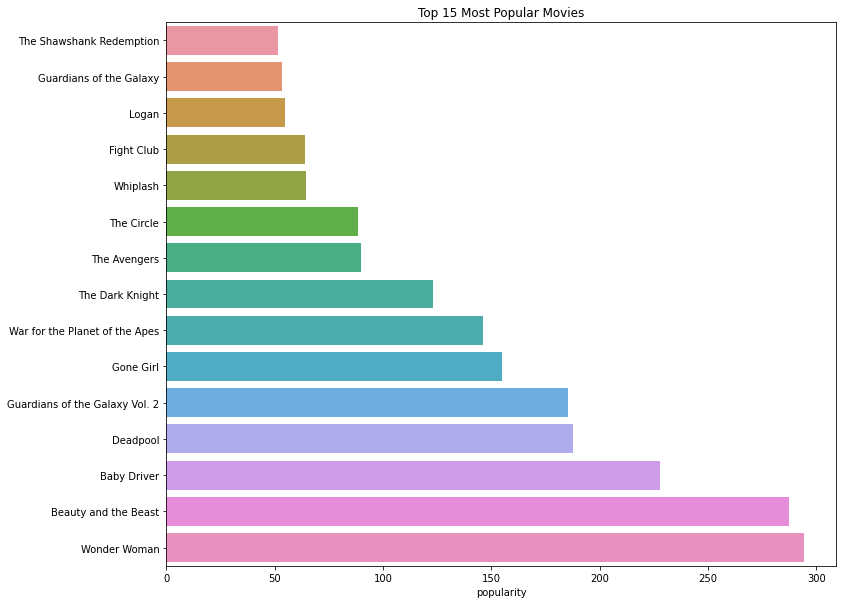

In [19]:
#visualization of most popular movies
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='popularity', y='original_title', data=popular_movies, order=popular_movies.sort_values('popularity', ascending=True).original_title, orient='h')

plt.title('Top 15 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

## Top 15 high budget movies

In [20]:
budget_movies = train_data.sort_values('budget', ascending=False).head(n=15)

#change budget figure into millions
budget_movies['budget(mil)'] = budget_movies['budget'].apply(lambda x : x//1000000)

#change revenue figure into millions
budget_movies['revenue(mil)'] = budget_movies['revenue'].apply(lambda x : x//1000000)

budget_movies[['original_title','genres','popularity','production_companies','cast','crew','budget(mil)','revenue(mil)']]

,original_title,genres,popularity,production_companies,cast,crew,budget(mil),revenue(mil)
2135,Pirates of the Caribbean: On Stranger Tides,"[Adventure, Action, Fantasy]",27.887720,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Pen√©lope Cruz, Ian McShane, Kev...","[Dariusz Wolski, Jerry Bruckheimer, Ted Elliot...",380,1045
2209,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",31.363664,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",300,961
2770,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]",37.379420,"[Marvel Studios, Prime Focus, Revolution Sun S...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Danny Elfman, Christopher Boyes, Christopher ...",280,1405
1425,Superman Returns,"[Adventure, Fantasy, Action, Science Fiction]",13.284712,"[DC Comics, Legendary Pictures, Warner Bros., ...","[Brandon Routh, Kevin Spacey, Kate Bosworth, J...","[Roger Mussenden, Jon Peters, Diane Macke, Gil...",270,391
1270,John Carter,"[Action, Adventure, Science Fiction]",14.670353,[Walt Disney Pictures],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",260,284
1630,Transformers: The Last Knight,"[Action, Science Fiction, Thriller, Adventure]",39.186819,"[Paramount Pictures, Di Bonaventura Pictures, ...","[Mark Wahlberg, Josh Duhamel, Laura Haddock, A...","[Akiva Goldsman, Steven S. DeKnight, Robert Ki...",260,604
2532,The Hobbit: An Unexpected Journey,"[Adventure, Fantasy, Action]",23.253089,"[WingNut Films, New Line Cinema, Warner Bros. ...","[Ian McKellen, Martin Freeman, Richard Armitag...","[Peter Jackson, Howard Shore, Carolynne Cunnin...",250,1021
961,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]",19.083723,"[Warner Bros., Heyday Films]","[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Bruno Delbonnel, Stephanie McMillan, Stuart C...",250,933
906,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",20.582580,"[Legendary Pictures, Warner Bros., DC Entertai...",[],[],250,1084
666,The Hobbit: The Desolation of Smaug,"[Adventure, Fantasy]",20.644776,"[WingNut Films, New Line Cinema, Warner Bros. ...","[Martin Freeman, Ian McKellen, Richard Armitag...","[Victoria Burrows, Amy Hubbard, John Hubbard, ...",250,958


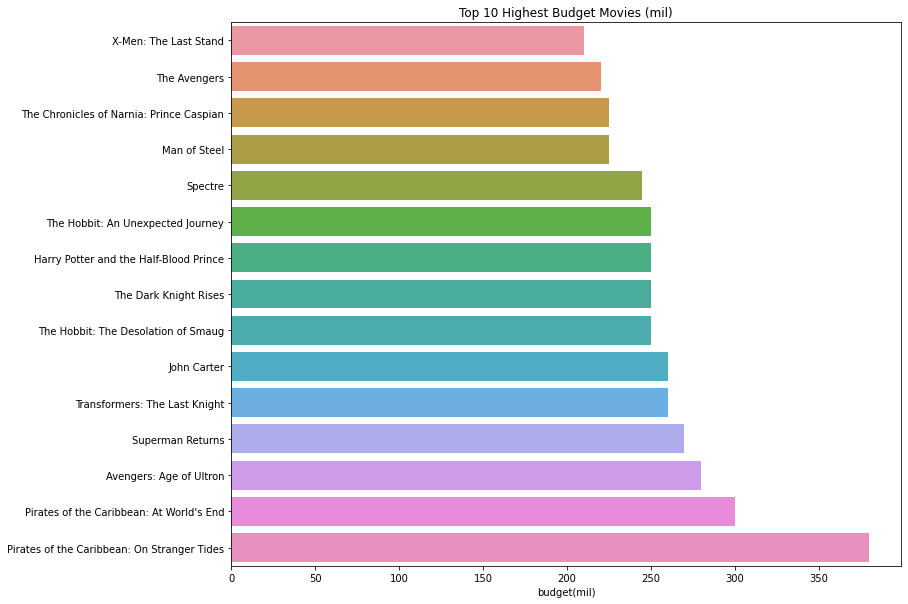

In [21]:
#visualization of most budget movies
plt.figure(figsize=(12,10))
ax = sns.barplot(x='budget(mil)', y='original_title', data=budget_movies, order=budget_movies.sort_values('budget(mil)', ascending=True).original_title,orient='h')

plt.title('Top 10 Highest Budget Movies (mil)',fontsize=12)

plt.ylabel('')

plt.show()

## Genre - visualization of the relationship between genre and revenue

In [22]:
train_data.genres.isnull().sum()

0

In [23]:
df1 = train_data['genres'].apply(lambda x : pd.Series([1]*len(x), index=x))#1D array to hold string
df2 = pd.concat([train_data,df1],axis=1)
genres = df1.columns #prepare dataset to visualize data


/var/folders/ms/5jxhpktn4ts_bkyr5s47mbmh0000gn/T/ipykernel_16794/647788540.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1 = train_data['genres'].apply(lambda x : pd.Series([1]*len(x), index=x))#1D array to hold string


In [24]:
genres_data = []
#use forloop to perform several calculations and append them
for column in genres:
    total_movies = df2[df2[column]==1][column].count()
    total_revenue = df2[df2[column]==1]['revenue'].sum()
    total_budget = df2[df2[column]==1]['budget'].sum()
    median_revenue = df2[df2[column]==1]['revenue'].median()
    median_budget = df2[df2[column]==1]['budget'].median()

    genres_data.append([column,total_movies,total_revenue,total_budget,median_revenue,median_budget])



In [25]:
#new dataframe
genres_data = pd.DataFrame(genres_data, columns=['genres', 'total_movies', 'total_revenue', 'total_budget', 'median_revenue', 'median_budget'])

genres_data[['genres', 'total_movies', 'total_revenue', 'total_budget', 'median_revenue', 'median_budget']].sort_values('total_movies', ascending=False)

,genres,total_movies,total_revenue,total_budget,median_revenue,median_budget
1,Drama,1531,69516699191,25733940425,11293663.0,6000000.0
0,Comedy,1028,62580263721,19614445621,18809184.0,8000000.0
4,Thriller,789,53917610066,20873192826,21890845.0,13000000.0
5,Action,741,82283193867,29934126656,36000000.0,20000000.0
3,Romance,571,30094559216,8944336886,14016568.0,5500000.0
11,Crime,469,27901408828,11128971302,24048000.0,12600000.0
7,Adventure,439,77180369998,23738161039,59700000.0,28000000.0
8,Horror,301,15865430318,4578070363,17037887.0,6000000.0
12,Science Fiction,290,35486481131,12701705758,35109301.5,20000000.0
2,Family,260,36113426664,11048890059,57470029.5,24500000.0


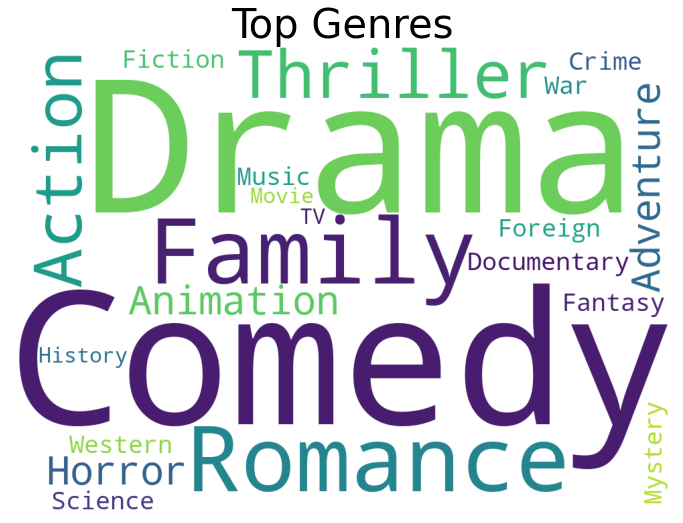

In [26]:
#plot wordcloud picture
plt.figure(figsize=(12,10))

words = ' '.join(genres)

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,width=1000, height=700).generate(words)

plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=40)
plt.axis("off")
plt.show()

This shows that drama has significantly outnumbered other genres. TV movie only has one movie. 

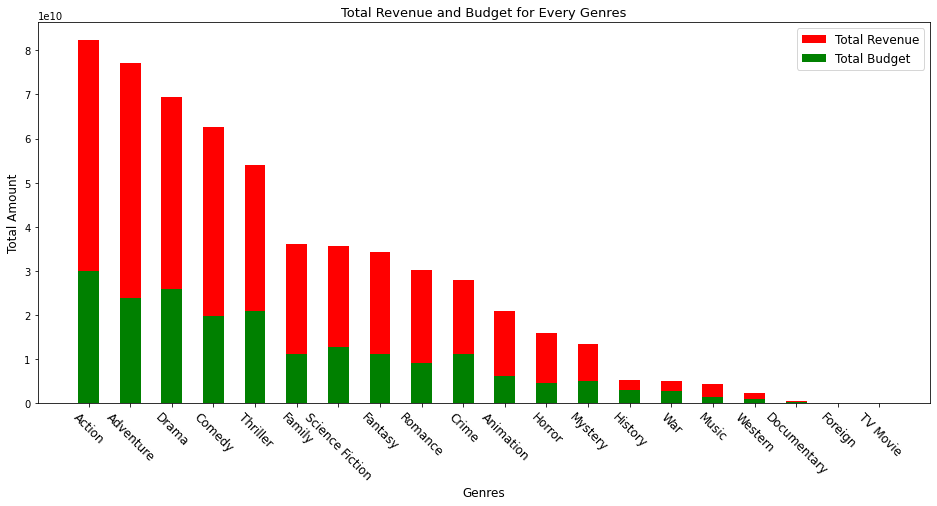

In [27]:
plt.figure(figsize=(16,7))

#initialize numbers of index and width
index = np.arange(len(genres))
width = 0.5

#descending
genres_data = genres_data.sort_values('total_revenue', ascending=False)

plt.bar(index, genres_data['total_revenue'],width, label="Total Revenue", color="r")
plt.bar(index, genres_data['total_budget'], width, label = "Total Budget",color="g")

plt.ylabel('Total Amount',fontsize=12)
plt.xlabel('Genres',fontsize=12)
plt.title('Total Revenue and Budget for Every Genres',fontsize=13)
plt.xticks(index,labels = genres_data['genres'].values, fontsize=12, rotation=-45)
plt.legend(loc='upper right', fontsize=12)
plt.show()


this shows total revenue and budget for each of the genres. Action, adventure and drama are the top 3 genres that generated most revenue. However, they had more budget too.

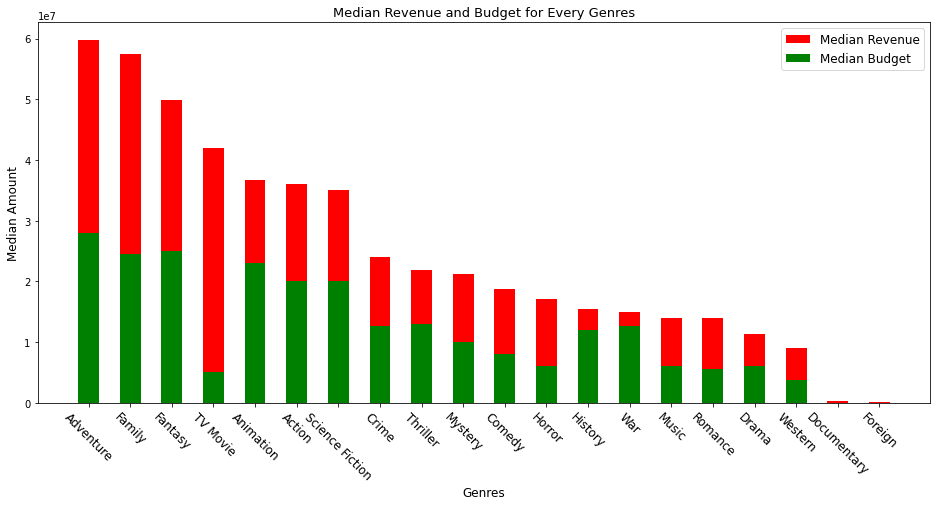

In [28]:
plt.figure(figsize=(16,7))

index = np.arange(len(genres))
width = 0.5

genres_data = genres_data.sort_values('median_revenue', ascending=False)

plt.bar(index, genres_data['median_revenue'],width, label="Median Revenue", color="r")
plt.bar(index, genres_data['median_budget'], width, label = "Median Budget",color="g")

plt.ylabel('Median Amount',fontsize=12)
plt.xlabel('Genres',fontsize=12)
plt.title('Median Revenue and Budget for Every Genres',fontsize=13)
plt.xticks(index,labels = genres_data['genres'].values, fontsize=12, rotation=-45)
plt.legend(loc='upper right', fontsize=12)
plt.show()

Median revenue and budget tells us that TV movie had generate a high median revenue. However, there was only one movie made in this genres.

## Analyse runtime

In [29]:
train_data.runtime.describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [30]:
train_data.runtime.isnull().sum()

2

In [31]:
train_data.runtime.fillna(np.mean(train_data.runtime))

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

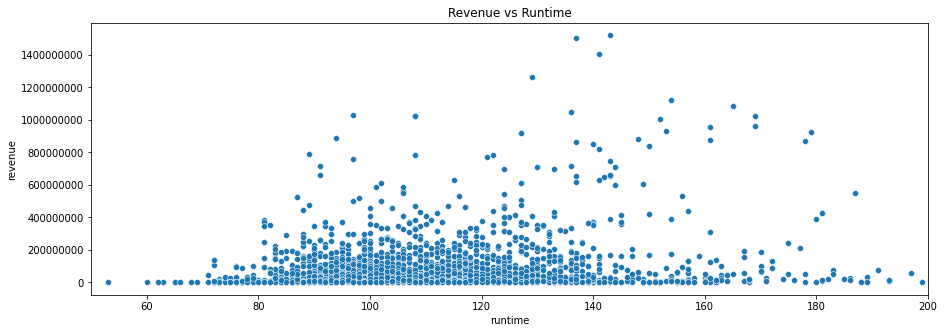

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='runtime',y='revenue',data=train_data)

ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue vs Runtime')
plt.xlim(50, 200)
plt.show()


### Correlation plot

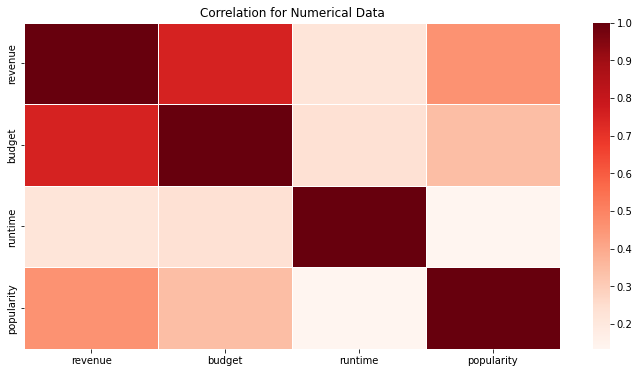

In [33]:
plt.figure(figsize=(12,6))
numerical_data = ['revenue','budget','runtime','popularity']
sns.heatmap(train_data[numerical_data].corr(), linewidths=.8, cmap='Reds')
plt.title('Correlation for Numerical Data')
plt.show()

In [34]:
train_data[numerical_data].corr()['revenue'].sort_values(ascending=False)


revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
Name: revenue, dtype: float64

In [35]:
#fill NaN with 0
train_data.fillna(value=0, inplace=True)
test_data.fillna(value=0, inplace=True)

In [36]:
train_data.isna().sum().sort_values(ascending=False)

id                       0
production_countries     0
crew                     0
cast                     0
Keywords                 0
title                    0
tagline                  0
status                   0
spoken_languages         0
runtime                  0
release_date             0
production_companies     0
belongs_to_collection    0
poster_path              0
popularity               0
overview                 0
original_title           0
original_language        0
imdb_id                  0
homepage                 0
genres                   0
budget                   0
revenue                  0
dtype: int64

## Analyse Release Year, Month and Date

In [37]:
def preparation(df):
    #information for better visualization
    #add 1 or 0 for some attributes
    df['Released_status'] = 1
    df.loc[df['status'] != "Released","Released_status"] = 0

    df['OriginalLanguage(En)'] = 1
    df.loc[df['original_language'] != "en","OriginalLanguage(En)"] = 0

    #split release date into day, month and year, expand and replace na with 0 and turn into int type
    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    
    df.loc[ (df['release_year'] <= 20) & (df['release_year'] < 100), "release_year"] += 2000

    df.loc[ (df['release_year'] > 20)  & (df['release_year'] < 100), "release_year"] += 1900


    #drop column which are not needed
    df = df.drop(['belongs_to_collection','genres','homepage','overview', 'imdb_id'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline'],axis=1)

    return df



In [38]:
#apply in train data
train = preparation(train_data)
train['id'] = range(1, len(train)+1)
train.index = train['id']

test= preparation(test_data)
test_id=test['id'].copy()


types = list(train.columns)
for i in types:
    if i != 'id' and 'revenue':
        types = i



In [39]:
train.head()

,id,budget,popularity,runtime,revenue,Released_status,OriginalLanguage(En),release_month,release_day,release_year
id,,,,,,,,,,
1,1,14000000,6.575393,93.0,12314651,1,1,2,20,2015
2,2,40000000,8.248895,113.0,95149435,1,1,8,6,2004
3,3,3300000,64.299990,105.0,13092000,1,1,10,10,2014
4,4,1200000,3.174936,122.0,16000000,1,0,3,9,2012
5,5,0,1.148070,118.0,3923970,1,0,2,5,2009


In [40]:
test.isna().sum()
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4398 non-null   int64  
 1   budget                4398 non-null   int64  
 2   popularity            4398 non-null   float64
 3   runtime               4398 non-null   float64
 4   Released_status       4398 non-null   int64  
 5   OriginalLanguage(En)  4398 non-null   int64  
 6   release_month         4398 non-null   int64  
 7   release_day           4398 non-null   int64  
 8   release_year          4398 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 309.4 KB


In [41]:
movies_year = train.sort_values('release_year', ascending=False).head(n=2500)
movies_year

,id,budget,popularity,runtime,revenue,Released_status,OriginalLanguage(En),release_month,release_day,release_year
id,,,,,,,,,,
392,392,7075038,10.181000,140.0,9868942,1,0,4,12,2017
497,497,2800000,12.560942,80.0,3600000,1,1,4,21,2017
2750,2750,0,15.597500,89.0,1803009,1,1,5,12,2017
315,315,175000000,19.148182,109.0,350170057,1,1,6,15,2017
1491,1491,0,33.536359,93.0,5000000,1,0,3,10,2017
...,...,...,...,...,...,...,...,...,...,...
2654,2654,6500000,6.476534,108.0,54215416,1,1,7,24,1987
920,920,0,1.047417,96.0,3832228,1,1,8,14,1987
585,585,0,0.773954,116.0,1083282,1,1,11,25,1987


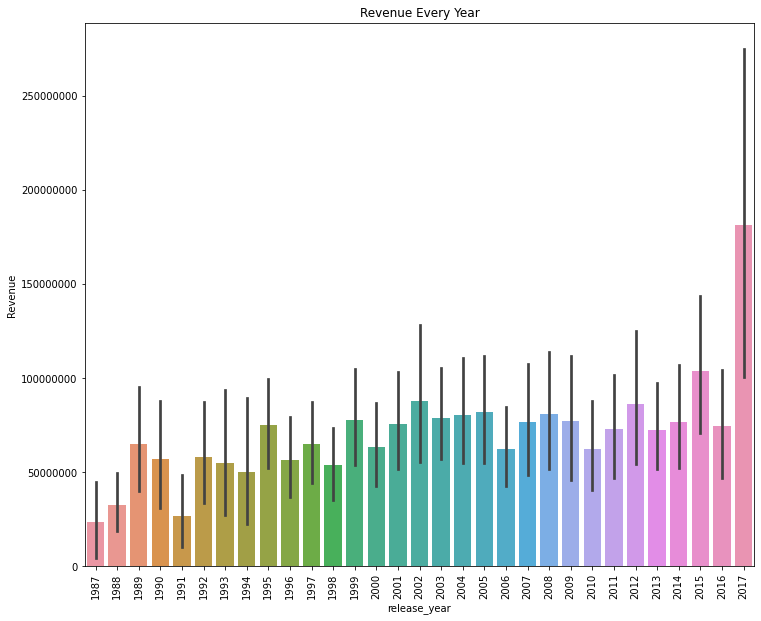

In [42]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='release_year', y='revenue', data=movies_year)

plt.title('Revenue Every Year',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

The revenue for movie has increased over the years with a highest growth in 2017

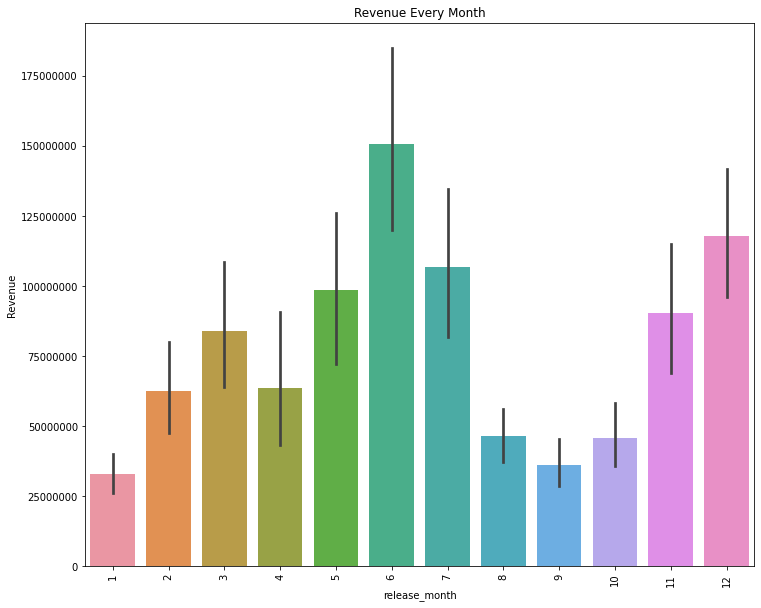

In [43]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='release_month', y='revenue', data=movies_year)

plt.title('Revenue Every Month',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

This indicates that movie will generate high revenue when the release month is on mid year which are may, june and july, as well as end of the year on november and december

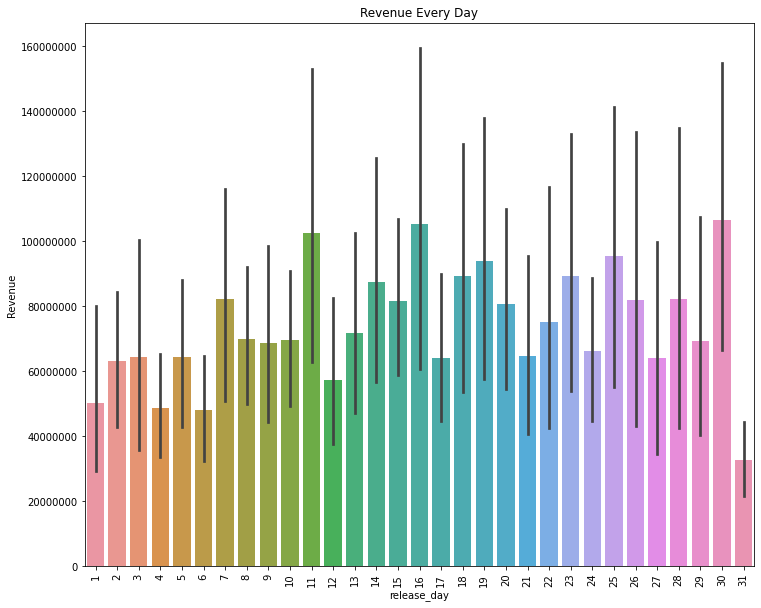

In [44]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='release_day', y='revenue', data=movies_year)

plt.title('Revenue Every Day',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

It seems like movie did better when it was released on 11th, 16th, 30th of the month. On the other hand, movie tends to perform worse when it was released at the beginning of the month. 31st should not be taken into consideration because it does not happen in every month.

### Modelling, import KFold and split train and test data


In [45]:
from sklearn.model_selection import train_test_split
X=train.drop(['revenue'], axis=1).copy()
y=np.log1p(train['revenue'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=2)

In [46]:
train_X.head()

,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year
id,,,,,,,,,
2370,2370,70000000,7.739633,134.0,1,1,12,25,2006
1165,1165,30000000,6.347850,105.0,1,1,11,11,1993
478,478,3200000,5.510288,100.0,1,1,4,5,2016
1729,1729,10000000,6.452069,102.0,1,1,9,10,2011
1066,1066,85000000,12.162760,122.0,1,1,6,7,2007


In [47]:
train_y.head()

id
2370    18.858534
1165    17.802620
478     15.266473
1729    15.114358
1066    19.556308
Name: revenue, dtype: float64

In [48]:
test_y.head()

id
1292    17.118274
596     12.273736
237     15.538277
2825    17.649883
1291    16.325802
Name: revenue, dtype: float64

In [49]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 2370 to 2576
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2400 non-null   int64  
 1   budget                2400 non-null   int64  
 2   popularity            2400 non-null   float64
 3   runtime               2400 non-null   float64
 4   Released_status       2400 non-null   int64  
 5   OriginalLanguage(En)  2400 non-null   int64  
 6   release_month         2400 non-null   int64  
 7   release_day           2400 non-null   int64  
 8   release_year          2400 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 187.5 KB


In [50]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1292 to 311
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    600 non-null    int64  
 1   budget                600 non-null    int64  
 2   popularity            600 non-null    float64
 3   runtime               600 non-null    float64
 4   Released_status       600 non-null    int64  
 5   OriginalLanguage(En)  600 non-null    int64  
 6   release_month         600 non-null    int64  
 7   release_day           600 non-null    int64  
 8   release_year          600 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.9 KB


In [51]:
test_X.head()

,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year
id,,,,,,,,,
1292,1292,8000000,11.842837,163.0,1,1,12,14,1984
596,596,0,1.985348,88.0,1,0,1,7,2013
237,237,15000000,3.450402,87.0,1,1,8,16,1996
2825,2825,0,5.831622,114.0,1,1,11,18,1994
1291,1291,15000000,4.079853,96.0,1,1,7,11,1986


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Testing with Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(train_X, train_y)
predict_linear = linear.predict(test_X)

In [54]:
linear.score(test_X, test_y)

0.2548825929611215

In [55]:
linear.score(train_X,train_y)

0.2856665580072234

In [56]:
print("RMSE linear: "+ str(np.sqrt(mean_squared_error(predict_linear, test_y))))

RMSE linear: 2.800770479620727


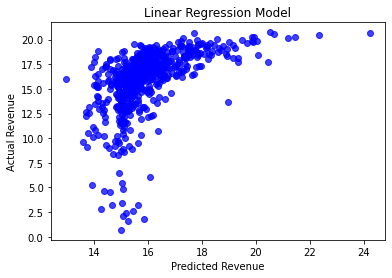

In [57]:
#output using test data for Linear regression model
actual_revenue = test_y
plt.scatter(predict_linear, actual_revenue, alpha=0.75,color='b')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Linear Regression Model')
plt.show()

### Testing with Random Forest Regression Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=10, min_samples_split=5,n_estimators=1000, random_state=1)
random_forest.fit(train_X, train_y)
predict_random = random_forest.predict(test_X)

In [59]:
random_forest.score(test_X, test_y)

0.4785783264200548

In [60]:
random_forest.score(train_X, train_y)

0.8153719260024755

In [61]:
print("RMSE random: " + str(np.sqrt(mean_squared_error(predict_random, test_y))))

RMSE random: 2.3429321143989013


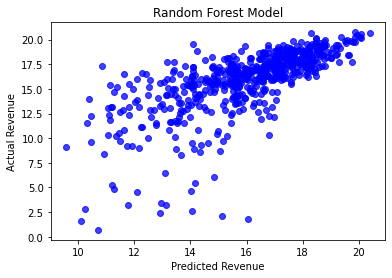

In [62]:
#output using test data for random forest model
actual_revenue = test_y
plt.scatter(predict_random, actual_revenue, alpha=0.75,color='b')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Random Forest Model')
plt.show()

### Testing with Lasso Regression Model

In [63]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=50, max_iter=50, tol=0.1)
lasso_model.fit(train_X, train_y)
predict_lasso = lasso_model.predict(test_X)

In [64]:
lasso_model.score(test_X, test_y)

0.22176706876261842

In [65]:
lasso_model.score(train_X,train_y)

0.23955045175507317

In [66]:
print("RMSE Lasso: " + str(np.sqrt(mean_squared_error(predict_lasso, test_y))))

RMSE Lasso: 2.862331748660421


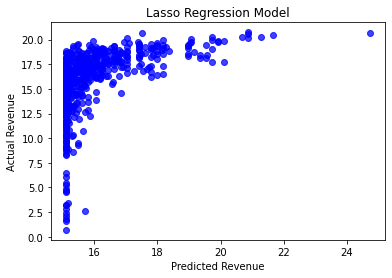

In [67]:
#output using test data for Lasso Regression model
actual_revenue = test_y
plt.scatter(predict_lasso, actual_revenue, alpha=0.75,color='b')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Lasso Regression Model')
plt.show()

### Testing with Ridge Regression Model

In [68]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(train_X,train_y)
predict_ridge = ridge_model.predict(test_X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53374e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [69]:
ridge_model.score(test_X, test_y)

0.25617836953711515

In [70]:
ridge_model.score(train_X,train_y)

0.28347078795332326

In [71]:
print("RMSE ridge: " + str(np.sqrt(mean_squared_error(predict_ridge, test_y))))

RMSE ridge: 2.7983341172935283


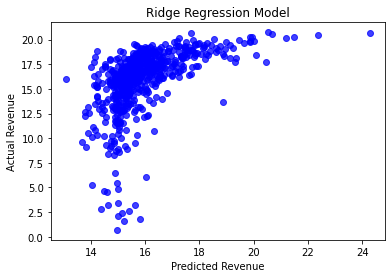

In [72]:
#output using test data for Lasso Regression model
actual_revenue = test_y
plt.scatter(predict_ridge, actual_revenue, alpha=0.75,color='b')
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Ridge Regression Model')
plt.show()

# Model Evaluation

## Evaluation for Random Forest Regression Model

In [73]:
combine_data = pd.concat([train_X,test_X],axis=0)
predicted_revenue = random_forest.predict(combine_data)
full_data = X
full_data['revenue'] = (train['revenue'])
full_data['predicted_revenue'] = np.expm1(predicted_revenue)

full_data.head()


,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year,revenue,predicted_revenue
id,,,,,,,,,,,
1,1,14000000,6.575393,93.0,1,1,2,20,2015,12314651,1.160228e+08
2,2,40000000,8.248895,113.0,1,1,8,6,2004,95149435,4.365354e+07
3,3,3300000,64.299990,105.0,1,1,10,10,2014,13092000,2.075848e+06
4,4,1200000,3.174936,122.0,1,0,3,9,2012,16000000,9.278071e+06
5,5,0,1.148070,118.0,1,0,2,5,2009,3923970,1.841496e+08


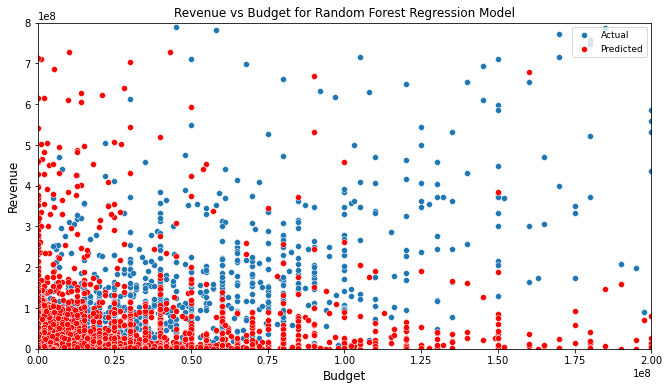

In [74]:
plt.figure(figsize=(11,6))

#input 2 variables including revenue and predicted revenue
sns.scatterplot(x='budget',y='revenue',data=full_data, label='Actual')
sns.scatterplot(x='budget',y='predicted_revenue',data=full_data, label='Predicted',color='red')
plt.xlabel('Budget', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

#set limit for x and y axis
plt.ylim(0, 800000000)
plt.xlim(0, 200000000)
plt.title("Revenue vs Budget for Random Forest Regression Model")
plt.legend(loc='upper right', fontsize=9)
plt.show()

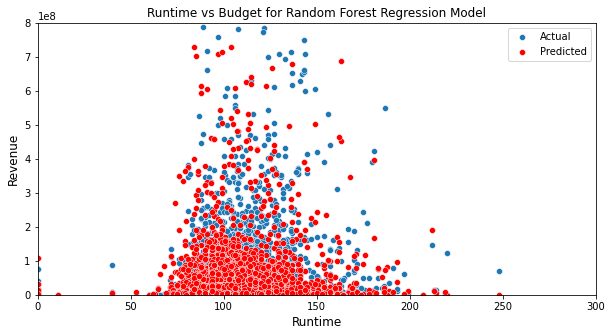

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime',y='revenue',data=full_data, label='Actual')
sns.scatterplot(x='runtime',y='predicted_revenue',data=full_data, label='Predicted',color='red')
plt.xlabel('Runtime', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

#set limit for x and y axis
plt.ylim(0, 800000000)
plt.xlim(0, 300)
plt.title("Runtime vs Budget for Random Forest Regression Model")
plt.show()

## Evaluation for Lasso Regression Model

In [76]:
combine_data = pd.concat([train_X,test_X],axis=0)
predicted_revenue1 = lasso_model.predict(combine_data)
full_data1 = X
full_data1['revenue'] = (train['revenue'])
full_data1['predicted_revenue'] = np.expm1(predicted_revenue1)

full_data1.head()

,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year,revenue,predicted_revenue
id,,,,,,,,,,,
1,1,14000000,6.575393,93.0,1,1,2,20,2015,12314651,5.367554e+07
2,2,40000000,8.248895,113.0,1,1,8,6,2004,95149435,1.148417e+07
3,3,3300000,64.299990,105.0,1,1,10,10,2014,13092000,4.087109e+06
4,4,1200000,3.174936,122.0,1,0,3,9,2012,16000000,5.312039e+06
5,5,0,1.148070,118.0,1,0,2,5,2009,3923970,9.569851e+07


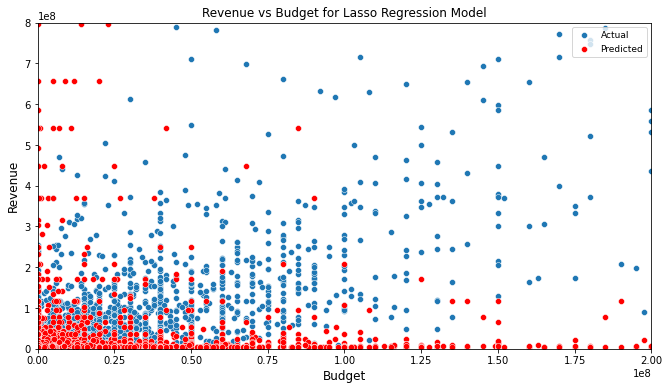

In [77]:
plt.figure(figsize=(11,6))

#input 2 variables including revenue and predicted revenue
sns.scatterplot(x='budget',y='revenue',data=full_data1, label='Actual')
sns.scatterplot(x='budget',y='predicted_revenue',data=full_data1, label='Predicted',color='red')
plt.xlabel('Budget', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

#set limit for x and y axis 80m revenue and 20m
plt.ylim(0, 800000000)
plt.xlim(0, 200000000)
plt.title("Revenue vs Budget for Lasso Regression Model")
plt.legend(loc='upper right', fontsize=9)
plt.show()

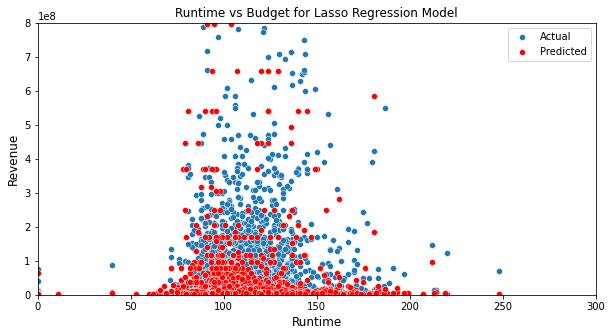

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime',y='revenue',data=full_data1, label='Actual')
sns.scatterplot(x='runtime',y='predicted_revenue',data=full_data1, label='Predicted',color='red')
plt.xlabel('Runtime', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

#set limit for x and y axis
plt.ylim(0, 800000000)
plt.xlim(0, 300)
plt.title("Runtime vs Budget for Lasso Regression Model")
plt.show()

# Prediction on test


In [79]:
#use test file
predict_test = random_forest.predict(test)
testing = test

testing['predicted_revenue'] = np.expm1(predict_test)
testing.head()

,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year,predicted_revenue
0,3001,0,3.851534,90.0,1,0,7,14,2007,1.206773e+06
1,3002,88000,3.559789,65.0,1,1,5,19,1958,1.931470e+06
2,3003,0,8.085194,100.0,1,1,5,23,1997,5.187435e+06
3,3004,6800000,8.596012,130.0,1,0,9,4,2010,1.748002e+06
4,3005,2000000,3.217680,92.0,1,1,2,11,2005,1.156504e+06


In [80]:
test_graph = testing.sort_values('predicted_revenue', ascending=False).head(n=15)
test_graph

,id,budget,popularity,runtime,Released_status,OriginalLanguage(En),release_month,release_day,release_year,predicted_revenue
1589,4590,250000000,145.882135,147.0,1,1,4,27,2016,1.080415e+09
3138,6139,250000000,31.435879,151.0,1,1,3,23,2016,1.079645e+09
388,3389,200000000,26.236870,142.0,1,1,4,16,2014,1.000213e+09
1906,4907,250000000,23.300362,146.0,1,1,10,17,2010,8.506566e+08
4183,7184,250000000,48.573287,136.0,1,1,4,12,2017,8.388865e+08
3151,6152,237000000,185.070892,162.0,1,1,12,10,2009,8.152102e+08
3867,6868,250000000,31.718977,144.0,1,1,12,10,2014,8.056015e+08
96,3097,258000000,27.614265,139.0,1,1,5,1,2007,7.908848e+08
3916,6917,178000000,28.712522,144.0,1,1,5,18,2016,7.902796e+08
985,3986,215000000,31.102267,136.0,1,1,6,27,2012,7.655182e+08


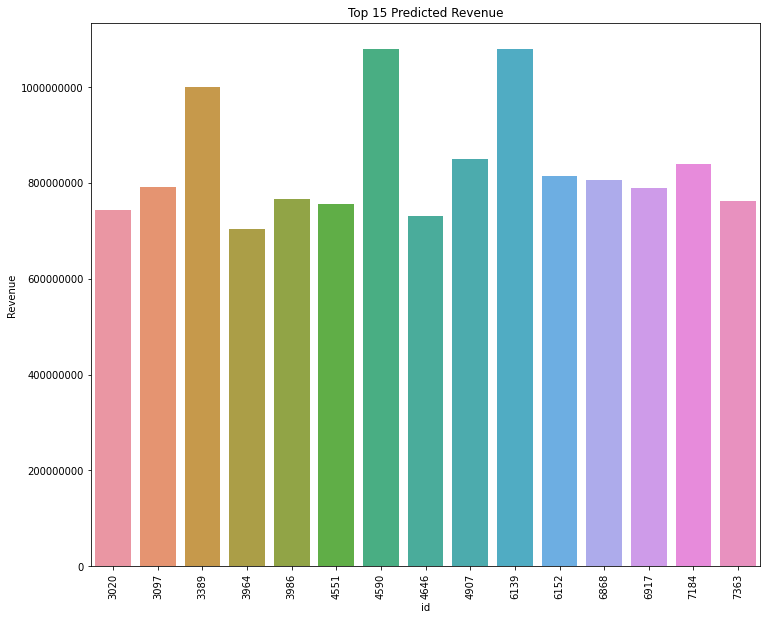

In [81]:
#plot for visualization on predicted revenue on test file
plt.figure(figsize=(12,10))
ax = sns.barplot(x='id', y='predicted_revenue', data=test_graph)

plt.title('Top 15 Predicted Revenue',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [82]:
#submit to kaggle
submission = pd.DataFrame({'id': test_id, 'revenue':np.exp(predict_test)})
submission = submission[['id', 'revenue']]
submission.head()
submission.to_csv("submission.csv", index=False)